# Chapter 5: Support Vector Machines

## First problem

### "Train a LinearSVC on a linearly separable dataset. Then train an SVC and a SGDClassifier on the same dataset. See if you can get them to produce roughly the same model"

In [1]:
#Importing the Iris dataset:

from sklearn.datasets import load_iris

data = load_iris()

The Iris Dataset is structured in a way that the four columns on the data correspond to the features: Sepal Length, Sepal Width, Petal Length and Petal Width

We will compare the labels "Setosa" (y=0) and "Versicolor" (y=1), using the Petal Length and Petal Width features

In [3]:
X = data['data'][:,(2,3)]
y = data['target']

In [5]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

To only select the Iris Setosa and Iris Versicolor, we'll do a mask which sets to True only the values that have these labels

In [10]:
set_vers_mask = ~(y==2)
set_vers_mask

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [11]:
#Now passing the mask to our data:
X = X[set_vers_mask]
y = y[set_vers_mask]

Now let's make a plot to visualize our datapoints for each label 

In [19]:
setosa = y==0

In [20]:
setosa

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

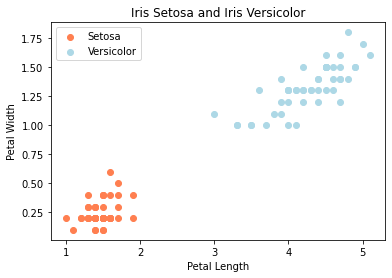

In [23]:
import matplotlib.pyplot as plt

plt.scatter(X[setosa,0],X[setosa,1], c='coral', label = 'Setosa')

plt.scatter(X[~setosa,0],X[~setosa,1], c='lightblue', label = 'Versicolor')

plt.title('Iris Setosa and Iris Versicolor')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.show()

The features seem to have different scales, which for a Linear SVM may be a downside

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

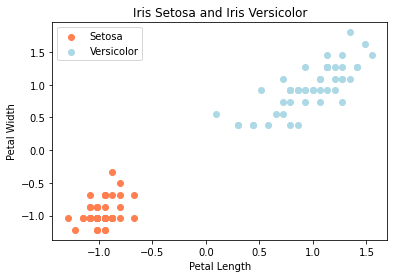

In [28]:
#Plot:
plt.scatter(X_scaled[setosa,0],X_scaled[setosa,1], c='coral', label = 'Setosa')

plt.scatter(X_scaled[~setosa,0],X_scaled[~setosa,1], c='lightblue', label = 'Versicolor')

plt.title('Iris Setosa and Iris Versicolor')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.show()